In [2]:
#include all the modules here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


## (1) Load Car_sales.csv into Pandas dataframe. Drop the following columns

In [3]:
# Create a Pandas DataFrame to store the data
df=pd.read_csv('Car_sales.csv', sep=',',header=None)
#df = pd.DataFrame(df)
print('\nLoaded Pandas dataframe\n----------\n',df.head())

# Drop the following columns
df = df.drop(df.columns[[0, 1, 2, 3, 4, 14, 15]], axis=1)
print('\nCar Sales dataframe without nonnumeric attributes\n----------\n',df.head())


Loaded Pandas dataframe
----------
              0        1                   2                    3   \
0  Manufacturer    Model  Sales_in_thousands  __year_resale_value   
1         Acura  Integra              16.919                16.36   
2         Acura       TL              39.384               19.875   
3         Acura       CL              14.114               18.225   
4         Acura       RL               8.588               29.725   

             4                   5            6           7          8   \
0  Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase   
1     Passenger                21.5          1.8         140      101.2   
2     Passenger                28.4          3.2         225      108.1   
3     Passenger                 NaN          3.2         225      106.9   
4     Passenger                  42          3.5         210      114.6   

      9       10           11             12               13             14  \
0  Width  Length 

##  (2) Drop row 0, because it is not the data, but the column name

In [4]:
df = df.drop(df.index[0])
print('\nCar Sales dataframe without column names\n----------\n',df.head())


Car Sales dataframe without column names
----------
       5    6    7      8     9      10     11    12  13
1   21.5  1.8  140  101.2  67.3  172.4  2.639  13.2  28
2   28.4  3.2  225  108.1  70.3  192.9  3.517  17.2  25
3    NaN  3.2  225  106.9  70.6    192   3.47  17.2  26
4     42  3.5  210  114.6  71.4  196.6   3.85    18  22
5  23.99  1.8  150  102.6  68.2    178  2.998  16.4  27


## (3) Rename the dataframe with the following column names

In [4]:
df.columns = ['Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency']
print('\nCar Sales dataset with new colunm name\n----------\n',df.head())


Car Sales dataset with new colunm name
----------
   Price_in_thousands Engine_size Horsepower Wheelbase Width Length  \
1               21.5         1.8        140     101.2  67.3  172.4   
2               28.4         3.2        225     108.1  70.3  192.9   
3                NaN         3.2        225     106.9  70.6    192   
4                 42         3.5        210     114.6  71.4  196.6   
5              23.99         1.8        150     102.6  68.2    178   

  Curb_weight Fuel_capacity Fuel_efficiency  
1       2.639          13.2              28  
2       3.517          17.2              25  
3        3.47          17.2              26  
4        3.85            18              22  
5       2.998          16.4              27  


## (4) Normalize each column (each column is called a feature) based on the following formula

In [5]:
#Drop rows with nan value
df = df.dropna()
data = df.values
row, col = data.shape
data2 = data[0:row,0:col]

x = data2.astype(np.float_)
#Apply normalize formula with numpy mean and std functions
xNorm = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
print('\nNormalized Car sales dataset values (first 5)\n----------\n', xNorm[0:5])



Normalized Car sales dataset values (first 5)
----------
 [[-0.40580037 -1.19398947 -0.79117998 -0.80778536 -1.09717367 -1.09178247
  -1.16184393 -1.21265887  0.96906987]
 [ 0.07432786  0.14398293  0.70963419  0.08920277 -0.22842702  0.43500784
   0.22193363 -0.19344876  0.26986756]
 [ 1.02066756  0.43069131  0.44478463  0.93419158  0.09011341  0.71057488
   0.74676043  0.01039326 -0.42933475]
 [-0.2325367  -1.19398947 -0.61461361 -0.62578777 -0.83654968 -0.67470804
  -0.59603967 -0.39729078  0.73600243]
 [ 0.46051796 -0.2382949   0.26821826  0.16720173  1.45114982  0.36797802
   0.29128012  0.13779452 -0.42933475]]


## (5) Calculate covariance matrix. 

In [7]:
cov_mat = np.cov(xNorm.T)
print('\nCovarinace matrix of Normalized Car sales dataset \n----------\n', cov_mat)


Covarinace matrix of Normalized Car sales dataset 
----------
 [[ 1.00662252  0.62767399  0.84663167  0.10921289  0.33066811  0.15594949
   0.5306389   0.42678805 -0.49464495]
 [ 0.62767399  1.00662252  0.8421901   0.47571586  0.69670775  0.54562553
   0.76594735  0.67136469 -0.74215005]
 [ 0.84663167  0.8421901   1.00662252  0.28403448  0.5382677   0.38733555
   0.61459193  0.50880262 -0.62015541]
 [ 0.10921289  0.47571586  0.28403448  1.00662252  0.68571672  0.84570069
   0.65575687  0.66116506 -0.50059891]
 [ 0.33066811  0.69670775  0.5382677   0.68571672  1.00662252  0.71041964
   0.72807351  0.66751695 -0.60629813]
 [ 0.15594949  0.54562553  0.38733555  0.84570069  0.71041964  1.00662252
   0.63342815  0.57471343 -0.45040517]
 [ 0.5306389   0.76594735  0.61459193  0.65575687  0.72807351  0.63342815
   1.00662252  0.87061833 -0.82505046]
 [ 0.42678805  0.67136469  0.50880262  0.66116506  0.66751695  0.57471343
   0.87061833  1.00662252 -0.80709306]
 [-0.49464495 -0.74215005 -0.620

## (6) Visualize covariance matrix by using seaborn heatmap.

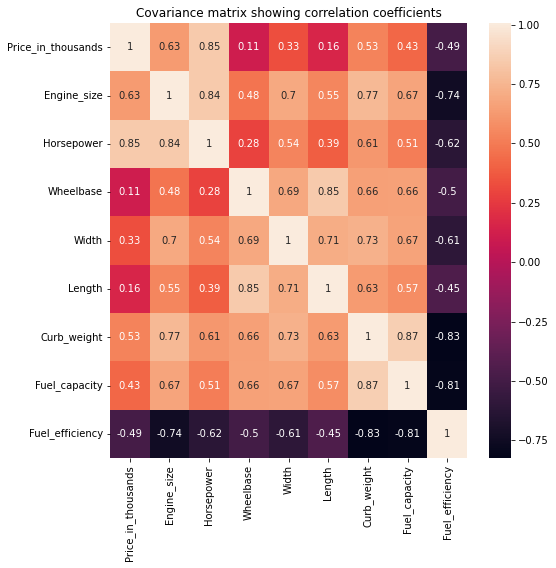

In [8]:
plt.figure(figsize=(8,8))
hm = sns.heatmap(cov_mat,
                 annot=True,
                 yticklabels=df.columns,
                 xticklabels=df.columns)
plt.title('Covariance matrix showing correlation coefficients')
plt.show()

## (7) The scree plot is used to determine the number of factors to retain in an exploratory  factor analysis (FA) or principal components to keep in a principal component analysis (PCA). 

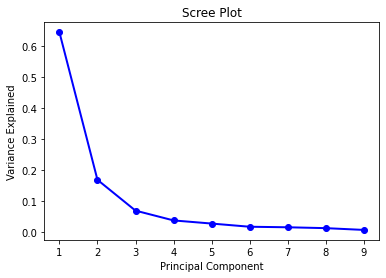

Explained variance ratios [0.64487325 0.16859907 0.06919312 0.03757983 0.027483   0.01718703
 0.01547079 0.01266229 0.00695163]


'\n\nWe can see:\n\nThe first principal component explains 64.48% of the total variation in the dataset.\nThe second principal component explains 16.85% of the total variation.\nThe third principal component explains 6.91% of the total variation.\nThe fourth principal component explains 3.75% of the total variation.\nNote that the percentages sum to 92%.\n\n'

In [10]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=9)

#fit PCA model to data
pca_fit = pca.fit(xNorm)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

print('Explained variance ratios',pca.explained_variance_ratio_)

'''

We can see:

The first principal component explains 64.48% of the total variation in the dataset.
The second principal component explains 16.85% of the total variation.
The third principal component explains 6.91% of the total variation.
The fourth principal component explains 3.75% of the total variation.
Note that the percentages sum to 92%.

'''

## (8) Replace the index with feature name on the following PCA components, if the number of PCA components is 2 in step (7) is two

In [11]:

#Calculate the eigenvalues
EValue, EVector = np.linalg.eig(cov_mat)

W = EVector[:,0:2]
EVector_df = pd.DataFrame(W, index=df.columns)

#The eigenvectors with feature names 
print('\nThe top two eigenvectors with index name\n----------\n',EVector_df)



The top two eigenvectors with index name
----------
                            0         1
Price_in_thousands -0.253272 -0.562979
Engine_size        -0.366310 -0.197064
Horsepower         -0.319855 -0.432989
Wheelbase          -0.299820  0.477671
Width              -0.344078  0.195284
Length             -0.303654  0.415656
Curb_weight        -0.383213  0.031375
Fuel_capacity      -0.359006  0.096633
Fuel_efficiency     0.350911  0.085697


## (9) Use this the first and second PCA to reduce the original 9-dimensional data to 2-dimensional data

In [13]:
pca = PCA(n_components=2)
pcaComponents = pca.fit_transform(xNorm)
pcaDf = pd.DataFrame(data = pcaComponents,
             columns = ['1st_Principal_Component', '2nd_Principal_Component'])
print('\nPCA dataframe\n----------\n',pcaDf)


PCA dataframe
----------
      1st_Principal_Component  2nd_Principal_Component
0                   2.965081                 0.318190
1                  -0.299687                 0.187271
2                  -1.525961                 0.105245
3                   2.002503                 0.104425
4                  -1.088064                -0.173430
..                       ...                      ...
147                 1.941828                 0.475987
148                 0.823413                 0.035579
149                 0.762915                 0.074696
150                -0.513337                 1.129268
151                -0.861130                 0.047256

[152 rows x 2 columns]
